In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [40]:
class Quaternion:
    def __init__(self, q):
        self.x = q[0]
        self.y = q[1]
        self.z = q[2]
        self.w = q[3]

    def __repr__(self):
        return "quaternion {} {}i {}j {}k".format(self.w, self.x, self.y, self.z)

    def __str__(self):
        return "quaternion {} {}i {}j {}k".format(self.w, self.x, self.y, self.z)

    def __mul__(self, other):
        return Quaternion([self.w * other.x + self.x * other.w + self.y * other.z - self.z * other.y,
                           self.w * other.y - self.x * other.z + self.y * other.w + self.z * other.x,
                           self.w * other.z + self.x * other.y - self.y * other.x + self.z * other.w,
                           self.w * other.w - self.x * other.x - self.y * other.y - self.z * other.z])

    def __pow__(self, power, modulo=None):
        if power == -1:
            return Quaternion([-self.x, -self.y, -self.z, self.w])

        norm = self.norm()
        if norm == 0:
            return Quaternion([self.x, self.y, self.z, self.w])

        norm_v = np.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)
        if 0.99 <= norm <= 1:
            phi = np.arccos(self.w)
            w = np.cos(power * phi)
            x = np.sin(power * phi) * self.x / norm_v
            y = np.sin(power * phi) * self.y / norm_v
            z = np.sin(power * phi) * self.z / norm_v
        else:
            mul = norm ** power
            phi = np.arccos(self.w / norm)
            w = mul * np.cos(power * phi)
            x = mul * np.sin(power * phi) * self.x / norm_v
            y = mul * np.sin(power * phi) * self.y / norm_v
            z = mul * np.sin(power * phi) * self.z / norm_v
        return Quaternion([x, y, z, w])

    def rotation(self):
        return np.array([[2 * (self.w ** 2 + self.x ** 2) - 1, 2 * (self.x * self.y - self.w * self.z), 2 * (self.x * self.z + self.w * self.y)],
                         [2 * (self.x * self.y + self.w * self.z), 2 * (self.w ** 2 + self.y ** 2) - 1, 2 * (self.y * self.z - self.w * self.x)],
                         [2 * (self.x * self.z - self.w * self.y), 2 * (self.y * self.z + self.w * self.x), 2 * (self.w ** 2 + self.z ** 2) - 1]])
    
    def inv_rotation(self):
        return np.array([[2 * (self.w ** 2 + self.x ** 2) - 1, 2 * (self.x * self.y + self.w * self.z), 2 * (self.x * self.z - self.w * self.y)],
                         [2 * (self.x * self.y - self.w * self.z), 2 * (self.w ** 2 + self.y ** 2) - 1, 2 * (self.y * self.z + self.w * self.x)],
                         [2 * (self.x * self.z + self.w * self.y), 2 * (self.y * self.z - self.w * self.x), 2 * (self.w ** 2 + self.z ** 2) - 1]])

    def norm(self):
        return np.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2 + self.w ** 2)
    
    def get_element(self):
        return np.array([self.x, self.y, self.z, self.w])
    
    def normalize(self):
        norm = self.norm()
        return np.array([self.x/norm, self.y/norm, self.z/norm, self.w/norm])
    
    def quaternion_to_euler_angle(self):
        ysqr = self.y * self.y

        t0 = +2.0 * (self.w * self.x + self.y * self.z)
        t1 = +1.0 - 2.0 * (self.x * self.x + ysqr)
        X = math.degrees(math.atan2(t0, t1))

        t2 = +2.0 * (self.w * self.y - self.z * self.x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        Y = math.degrees(math.asin(t2))

        t3 = +2.0 * (self.w * self.z + self.x * self.y)
        t4 = +1.0 - 2.0 * (ysqr + self.z * self.z)
        Z = math.degrees(math.atan2(t3, t4))

        return X, Y, Z


In [41]:
gt_path="/media/doyu/Junu_SSD/data/Hilti/2022/exp04_construction_upper_level.txt"
test_path="/home/doyu/doyu_ws/Polaris/odometry/A-LOAM/A-LOAM_ex4.txt"

In [42]:
gt = np.loadtxt(gt_path)
test = np.loadtxt(test_path)
print(gt.shape)
print(test.shape)

(1257, 8)
(927, 8)


In [43]:
ori = []
for quat in gt_ori:
    cor_orientation = Quaternion([quat[0], quat[1], quat[2], quat[3]])* Quaternion(gt_ori[0,:])**-1
    cor_orientation = cor_orientation.quaternion_to_euler_angle()
    ori.append(cor_orientation)

ori = np.asarray(ori)

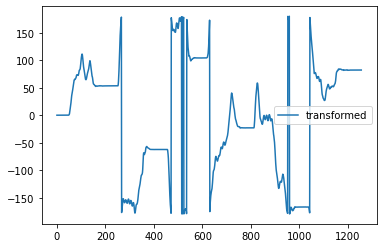

In [47]:
# plt.plot(gt_ori[:,0], lable="original")
plt.plot(ori[:,2], label="transformed")
plt.legend()
plt.show()